In [1]:
import pandas as pd
import matplotlib.pyplot as plt


first lets load the clients iperf and pcap data

In [2]:
iperf_data = pd.read_csv('iperf_log_2022-06-01-14_29_10.csv')

In [3]:
pcap_udp_dataClient = pd.read_csv('client_udp_data_14_29.csv')

make sure the timestamp column is useable as a timestamp and not just as a string

In [4]:
iperf_data.timestamp = pd.to_datetime(iperf_data.timestamp)

In [5]:
iperf_data=iperf_data.set_index('timestamp')

In [6]:
pcap_udp_dataClient.timestamp = pd.to_datetime(pcap_udp_dataClient.timestamp)

calculate the clients pcap datarate by summing up the values in the len column

In [7]:
pcap_udp_dataClient_datarates = pcap_udp_dataClient.set_index('timestamp').len.resample('1s').sum() * 8

In [8]:
pcap_udp_dataClient_datarates = pd.DataFrame(pcap_udp_dataClient_datarates)

merge pcap and iperf data for a simple comparison

In [9]:
df = pd.merge(pcap_udp_dataClient_datarates, iperf_data[['datarate']],how='inner', left_index=True, right_index=True).rename(columns={'len':'client_pcap_dr', 'datarate': 'iperf_dr'})

let's take a qucik look at our datarates

<AxesSubplot:xlabel='timestamp'>

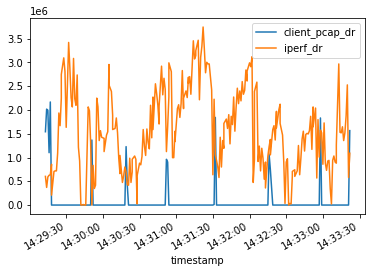

In [10]:
df.plot()

let's als add the server pcap data

In [11]:
pcap_udp_dataServer = pd.read_csv('server_udp_data.csv')

ensure the timestamp column is useable as a timestamp and not just as a string

In [12]:
pcap_udp_dataServer.timestamp = pd.to_datetime(pcap_udp_dataServer.timestamp)

calulate the server pcap datarate by summing up the values in the len column

In [13]:
pcap_udp_dataServer_datarates = pcap_udp_dataServer.set_index('timestamp').len.resample('1s').sum() * 8

In [14]:
pcap_udp_dataServer_datarates = pd.DataFrame(pcap_udp_dataServer_datarates)

let's merge everything into one dataframe

In [15]:
df = df.merge(pcap_udp_dataServer_datarates, how='inner', left_index=True, right_index=True).rename(columns={'len':'server_pcap_dr'})

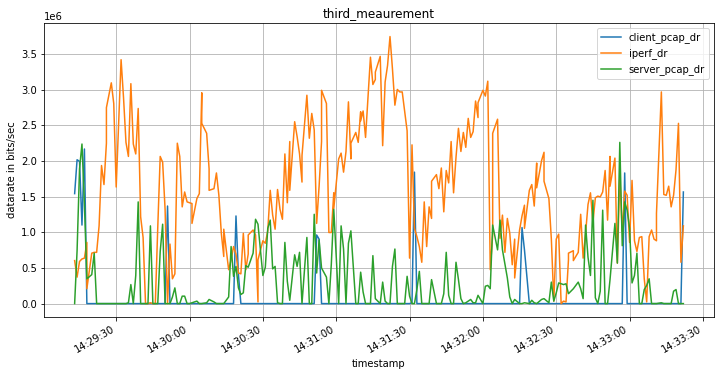

In [17]:
df.plot(figsize=(12,6), grid=True, title='third_meaurement')
plt.ylabel('datarate in bits/sec')
plt.savefig('third_meaurement.png')